In [1]:
import numpy as np
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2

import synth_gen

In [2]:
import sys
sys.path.append("../twintest")

import causality as intest
import viz

In [3]:
gps = synth_gen.GPsampler(gamma=10)
f = gps.get_func()

In [4]:
target = 1 # By defaul X->Y
nb_samples = 300


Nx = {'name': 'normal', 'var': 10}
Ny = {'name': 'normal', 'var': 1}

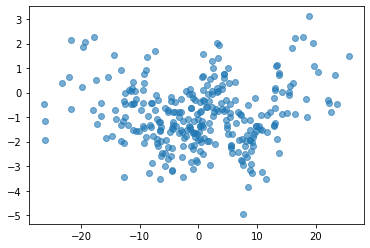

In [7]:
binary_am = synth_gen.BinaryAM(Nx, Ny, f, nb_samples)
x = binary_am.x
y = binary_am.y
plt.scatter(x, y, alpha=.6)

In [30]:
# model_params = {'model_type': 'NeuralNet', 'norm': False, 'learning_rate':0.01, 'epochs': 500, 'H': 100}

model_params = {'model_type': 'PolyRegreg', 'norm': False, 'learning_rate':0.01, 'epochs': 500, 'H': 100}

In [31]:
def eval_param(data_param, nb_runs, model_params):
    acc = 0
    for _ in range(nb_runs):
        x, y = synth_gen.am_from_param(data_param)
        pred = intest.estimate_effect(x, y, model_params=model_params) 
        acc += int(pred) # assume pred == 1 <-> correct since X -> Y
    return acc / nb_runs

In [32]:
acc_list = []
nb_runs = 20
for nb_s in [50, 75, 100, 125, 150, 200]:
    data_param = {'Nx': Nx, 'Ny': Ny, 'f':f, 'nb_samples': nb_s}


    acc = eval_param(data_param, nb_runs=nb_runs, model_params=model_params)
    acc_list.append(acc)

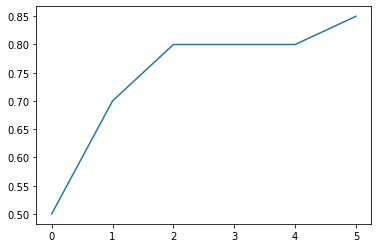

In [33]:
plt.plot(acc_list)

In [ ]:
plt.plot(acc_list)